# **CLUSTERING DATASET USING FLASK**

**Import library yang dibutuhkan**

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

**Mendapatkan dataset**

In [7]:
# Mendapatkan dataset
data = pd.read_csv('penguins_size.csv')

# print data
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


**Filling in missing values**

In [8]:
#checking number of null values in the data
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
# Dropping the 2 rows with null values for all variables

data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [10]:
#imputing the null values in sex with its mode

data['sex'] = data['sex'].fillna('MALE')

In [11]:
#dropping the 336th row due to its faulty value in sex variable

data.drop(data[data['sex']=='.'].index, inplace=True)

In [56]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


**Distribusi kelas**

In [20]:
# Distribusi kelas data
data.groupby('species').size()

species
Adelie       151
Chinstrap     68
Gentoo       122
dtype: int64

**Visualisasi Plotting Fitur yang Dipakai untuk Clustering**

culmen_length vs culmen_depth


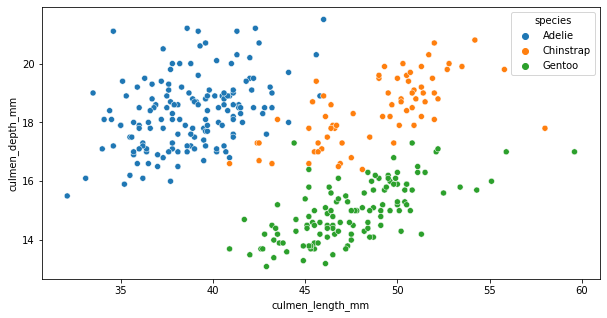

In [17]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

**Nilai SSE**

In [52]:
df = data.copy()
X = df[['culmen_length_mm','culmen_depth_mm']]

In [54]:
# Menyimpan nilai SSE untuk setiap k
SSE = []

# Definisi nilai k -> 1-10
K = range(1,11)

# Menghitung SSE
for k in K:
  # Membuat model clustering
  kmeanModel = KMeans(n_clusters=k)
  
  # Fitting model dengan data
  kmeanModel.fit(X)

  # Menghitung nilai SSE
  SSE.append(kmeanModel.inertia_)
  
  # Print nilai SSE
  if (k==1):
    print('k = %d \tSSE = %f \tDelta = %f' % (k, SSE[k-1], 0))
  else:
    print('k = %d \tSSE = %f \tDelta = %f' % (k, SSE[k-1], abs(SSE[k-2]-SSE[k-1])))

k = 1 	SSE = 11491.592845 	Delta = 0.000000
k = 2 	SSE = 3691.135491 	Delta = 7800.457353
k = 3 	SSE = 2316.188290 	Delta = 1374.947201
k = 4 	SSE = 1672.914934 	Delta = 643.273356
k = 5 	SSE = 1364.434086 	Delta = 308.480848
k = 6 	SSE = 1115.922377 	Delta = 248.511709
k = 7 	SSE = 945.637382 	Delta = 170.284995
k = 8 	SSE = 799.982762 	Delta = 145.654619
k = 9 	SSE = 679.951315 	Delta = 120.031447
k = 10 	SSE = 617.561252 	Delta = 62.390063


**Elbow method**

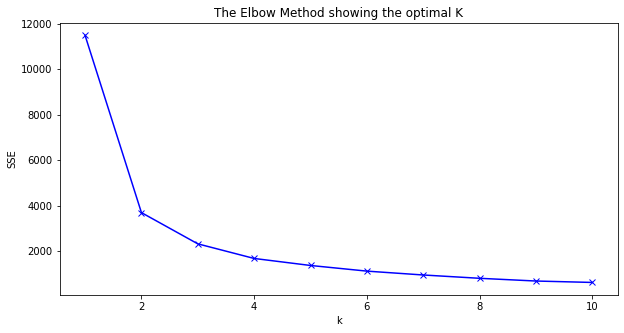

In [55]:
# Membuat Diagram Plotting SSE untuk Setiap K (Elbow)
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal K')
plt.show()

**clustering**

In [42]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Add new column to the data
X['cluster'] = y_kmeans.astype(object)
X.head()


,culmen_length_mm,culmen_depth_mm,cluster
0,39.1,18.7,1
1,39.5,17.4,1
2,40.3,18.0,1
4,36.7,19.3,1
5,39.3,20.6,1


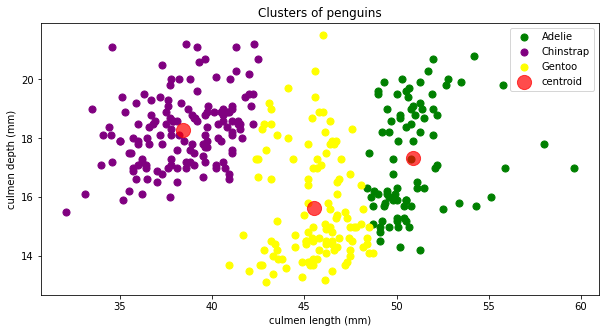

In [50]:
plt.scatter(X[y_kmeans == 0]['culmen_length_mm'], X[y_kmeans == 0]['culmen_depth_mm'], s=50, c='green', label='Adelie')
plt.scatter(X[y_kmeans == 1]['culmen_length_mm'], X[y_kmeans == 1]['culmen_depth_mm'], s=50, c='purple', label='Chinstrap')
plt.scatter(X[y_kmeans == 2]['culmen_length_mm'], X[y_kmeans == 2]['culmen_depth_mm'], s=50, c='yellow', label='Gentoo')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='centroid')
plt.title('Clusters of penguins')
plt.xlabel('culmen length (mm)')
plt.ylabel('culmen depth (mm)')
plt.legend()
plt.show()

**EXPORT MODEL**

In [57]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))